In [190]:
import numpy as np
import scipy
from scipy import stats, signal
import matplotlib.pyplot as plt
import matplotlib
import random as r

r.seed(12345)
plt.rcParams["figure.figsize"] = (15,10)

#Boris Chkodrov

#### Problem 1: Which is more probable when rolling 2 six-sided dice: rolling snake eyes or rolling sevens? What is the ratio of the probabilities?

I predict that rolling sevens is more common, as there is only a single way for two dice to roll snake eyes, whereas there are multiple ways for them to roll seven. I expect that rolling a seven will be about 6 times as likely as rolling snake eyes.

In [99]:
snakeeyes = 0
seven = 0
for roll in range(1,100000):
    roll1 = r.randrange(1,7)
    roll2 = r.randrange(1,7)
    if(roll1 == 1 and roll2 == 2):
        snakeeyes += 1
    if(roll1+roll2 == 7):
        seven += 1

print("Snake Eyes Count: " , snakeeyes)
print("Sevens Count: ", seven)
print("Ratio P(seven)/P(Snake Eyes): ", seven/snakeeyes)

Snake Eyes Count:  2892
Sevens Count:  16455
Ratio P(seven)/P(Snake Eyes):  5.689834024896266


As we can see, the numerical ratio of sevens to snake eyes is indeed near six.

#### Problem 2: Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

Analytical solution

$$P_{A+B}(x) = \sum_z P_A(z)P_B(x-z)$$

$P_{A+B}(7)=\sum_z{f(z)g(7-z)}$ where $1\leq z \leq 6$
$P_{A+B}(7)=f(1)g(6)+f(2)g(5)+...+f(6)g(1)$

As there are 6 total combinations of two dice which add up to 7, and any result on a single die is equally probable, we can say:

$P_{A+B}(7)=6*(\frac{1}{6}*\frac{1}{6}) = \frac{1}{6}$

Or, more generally: $P(x)=\frac{n}{6}$ Where x is any integer between 2 and 12, and n is the number of combinations of two dice which add up to x.

Numerical Solution:

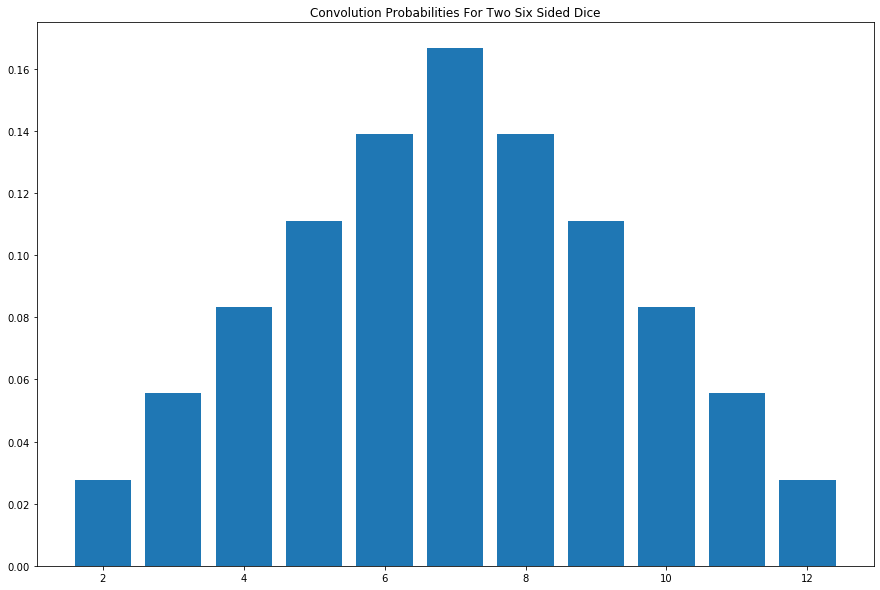

In [123]:
d6 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
prob = scipy.signal.convolve(d6, d6)
x = np.arange(2,len(prob)+2)
plt.bar(x,prob)
plt.title('Convolution Probabilities For Two Six Sided Dice')
plt.show()

#### Problem 3: Calculate the mean and variance of the distribution in problem 2:

We choose to not use the sample variance formula, as we are looking at a distribution with fixed values and not a sample of a distribution.

In [101]:
mean = sum(prob*x)
variance = sum(prob*np.square(x)) - mean**2

print("Distribution Mean: " , np.round(mean, 3))
print("Distribution Variance: " , np.round(variance,3))

Distribution Mean:  7.0
Distribution Variance:  5.833


#### Problem 4: Repeat 2, and graph the average of 10 dice. Is this a Gaussian distribution? explain in depth.

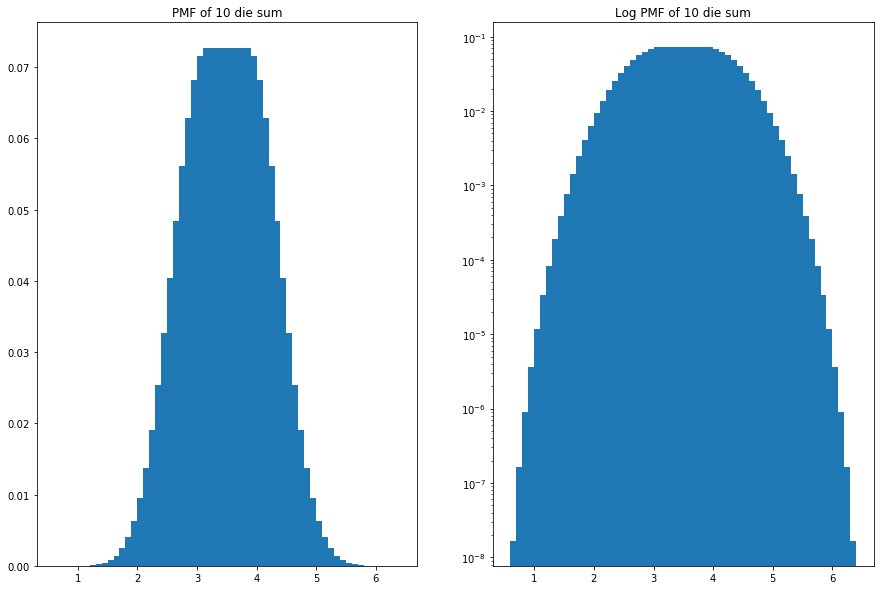

In [153]:
x = np.arange(1,6.1,0.1).tolist()
p4 = d6

for i in range(1,10):
    p4 = scipy.signal.convolve(p4,d6)
      

fig, (ax1,log1) = plt.subplots(1,2)
ax1.title.set_text("PMF of 10 die sum")
ax1.bar(x, p4)

log1.title.set_text("Log PMF of 10 die sum")
log1.bar(x, p4, log=True)

x = np.linspace(0,6)

plt.show()

Suppose we assume that our sample comes from a normal distribution. In that case, we would expect that when we perform the normal test, it should return a p-value greater than 0.05. If the normal test returns a smaller p-value, we can reject the null hypothesis and state that our sample did not come from a normal distribution - and therefore, the distribution we created through convolving the averages of 10 six sided dice is not gaussian.

In order to further make sure that our p-value is not a fluke, we will perform the normal test multiple times with new samples taken from both our distribution and the normal distribution, and then investigate the mean of those p-values.

In [143]:
#Take sample from the distribution we just made
s_sum = 0
n_sum = 0
for trial in range (1,101):
    s =  stats.rv_discrete(values=(x,p1)).rvs(size=50000)
    n = stats.norm.rvs(size=50000)
    s_sum += stats.normaltest(s).pvalue
    n_sum += stats.normaltest(n).pvalue
    
s_mean = s_sum/100
n_mean = n_sum/100
#Compare sample to a random sample from a normal distribution
print("Average p-value of 100 samples taken from convolution distribution: " , np.round(s_mean,3))
print("Average p-value of 100 samples taken from normal distribution" , np.round(n_mean,3))


Average p-value of 100 samples taken from convolution distribution:  0.259
Average p-value of 100 samples taken from normal distribution 0.49


As we can see, the average probability that our sample comes from a normal distribution is greater than 0.05. Therefore we cannot the null hypothesis and it is possible that our distribution is gaussian. That said, when we compare the average p-value of our distribution to the average p-value of a sample taken from a normal distribution, we do see a marked difference. Therefore I expect (but cannot prove) that our convolution distribution approaches a gaussian distribution as we increae the number of dice we use.

#### Problem 5: Show that the sum and average of an initially Gaussian distribution is also a Gaussian. How does the standard deviation of the resulting sum or average Gaussian change? Explore what this means for integrating a signal over time.

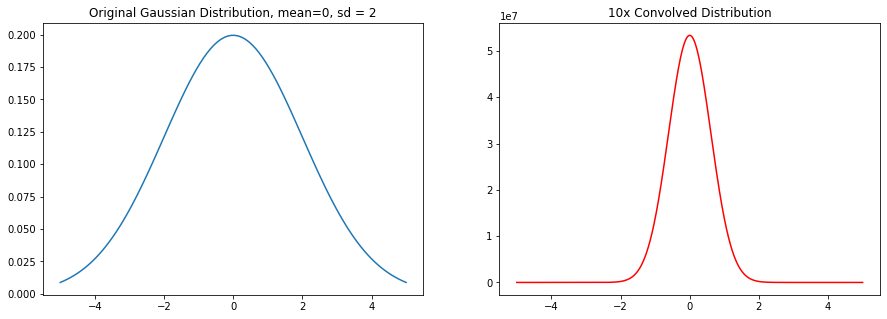

In [189]:
x_init = np.linspace(-5,5,100)
d_init = stats.norm.pdf(x_init, loc=0,scale=2) #d_init is a gaussian function with mean=0 and standard deviation = 2

#Now we will convolve it:
p = d_init
n = 10
for i in range(n-1):
    p = scipy.signal.convolve(p,d_init)

x = np.linspace(-5,5, len(p))

# fig, ((ax1,log1),(ax2,log2)) = plt.subplots(2,2)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.title.set_text("Original Gaussian Distribution, mean=0, sd = 2")
ax1.plot(x_init, d_init)

# log1.title.set_text("Log of Original Distribution")
# log1.bar(x_init, d_init, log=True)

ax2.title.set_text("10x Convolved Distribution")
ax2.plot(x, p, 'r')

# log2.title.set_text("Log of 10x Convolved Distribution")
# log2.bar(x, p, log=True)
plt.rcParams["figure.figsize"] = (15,5)

The left graph is the original Gaussian distribution, which has a standard deviation of two. The red graph on the right has been averaged ten times via convolution. Both graphs are clearly Gaussian distributions, however, the right graph is much more narrow and thus has a smaller standard deviation. We can also see that both distributions share the same mean.

Therefore, for integrating a signal over time, this shows that by averaging and processing data, we can narrow our distribution without changing the mean.